# Query-MSC Demo

In [1]:
import datetime

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from query_helpers import count, total_days, total_years, days_in_month, hours_in_month, query_variables
from query_temp import hdd
from query_rates import query_rain_rate_15

### Define the connection string

In [2]:
connection_string = "postgresql+psycopg2://user@dbmsc.pcic.uvic.ca/msc"

## Create the database connection in sqlalchemy
Using session objects

In [3]:
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

### Exectue first query - look at different variables available

In [4]:
df_q = pd.read_sql(query_variables(session).statement, engine)
df_q.head()

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
0,1401,,Hail,boolean,,16
1,1424,,Smoke or Haze,boolean,,18
2,1291,cloud_base_altitude,Ceiling currently observed,30s of meters,time: point,71
3,1292,visibility_in_air,Visibility currently observed,0.1 km,time: point,72
4,1293,air_pressure_at_sea_level,Sea level pressure,0.01 kPa,time: point,73


We can narrow it down further using Pandas, and get information on any variable that contains the word "temperature" in its description

In [5]:
df_q[df_q['long_description'].str.contains('temperature')]

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
5,1294,dew_point_temperature,Dew point temperature,0.1 Celsius,time: point,74
10,1300,wet_bulb_temperature,Wet bulb temperature,0.1 Celsius,,79
103,1392,air_temperature,Daily max temperature,0.1 Celsius,time: maximum,1
104,1393,air_temperature,Daily min temperature,0.1 Celsius,time: minimum,2
105,1394,air_temperature,Daily mean temperature,0.1 Celsius,time: mean,3
142,1444,air_temperature,Mean max temperature,0.1 Celsius,time: mean,40
143,1445,air_temperature,Mean min temperature,0.1 Celsius,time: mean,41
144,1446,air_temperature,Mean monthly temperature,0.1 Celsius,time: mean,42
145,1447,air_temperature_anomaly,Mean monthly temperature difference from normal,0.1 Celsius,,43
146,1448,air_temperature,Extreme max temperature,0.1 Celsius,time: maximum,44


Query helpers has some useful functions for querying design values, and makes use of Python's `datetime` module.

In [6]:
# Specify two dates:
start_time = datetime.datetime(1991, 7, 1)
end_time = datetime.datetime(2016, 7, 31)

We can make use of these to get some handy information about the days of interest.

In [7]:
print("Total days:", total_days(start_time, end_time))

Total days: 9162.0


In [8]:
print("Total years:", total_years(start_time, end_time))

Total years: 25.0


In [9]:
print("Total days in month over year range:", days_in_month(start_time, end_time))

Total days in month over year range: 775.0


In [10]:
print("Total days in month:", days_in_month(start_time, end_time)/total_years(start_time, end_time))

Total days in month: 31.0


In [11]:
print("Hours in month:", hours_in_month(start_time, end_time))

Hours in month: 18600.0


`query-msc` is still being developed, but these are some existing queries for design values...

Using pandas, we can read a sqlalchemy query directly into a pandas dataframe and leverage some of the handy tools that pandas provides. This dataframe for the design values is much smaller than it would be if all of the data from the variable of interest was downloaded and then filtered locally.

Here we are using the `hdd()` method provided by `query-msc`

In [12]:
df = pd.read_sql(
                hdd(start_time, end_time, session).statement,
                engine
)

We can now inspect the design values queried by the tool, and look at their values/distributions:

In [13]:
#show the first 5
df.head()

,hdd,min_time,max_time,lat,lon,station_id,completeness
0,347.916,1991-07-01,1994-09-30,41.7833,-82.6833,6063,0.128902
1,1345.332,1995-09-21,2014-06-27,41.8333,-82.4667,6103,0.467038
2,1505.420,1999-01-01,2016-07-30,41.9486,-82.5189,6143,0.482755
3,436.124,1991-07-01,1997-09-30,41.9500,-82.5167,6140,0.143855
4,92.068,1991-07-01,1993-06-30,42.0333,-82.9000,6036,0.031980


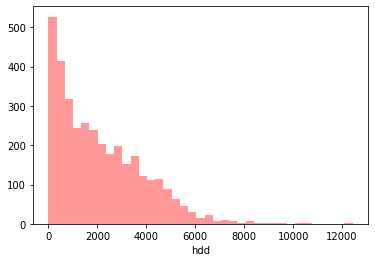

In [16]:
sns.distplot(df['hdd'], kde=False, color='r')

We can also look at the density distribution of stations across Canada by using seaborn's `joinplot`. It shows the density of stations with contours, as well as the histogram along each axis for latitude or longitude. 

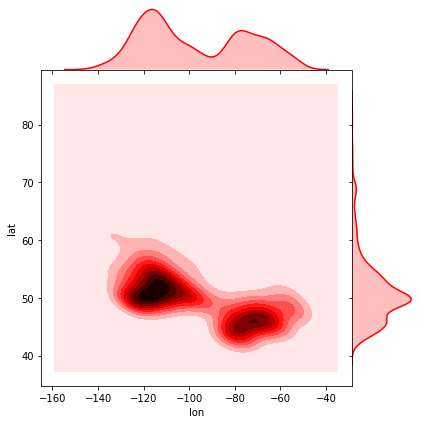

In [17]:
g = sns.jointplot("lon", "lat", data=df,
                  kind="kde", space=0, color="r")